In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy
import math

In [34]:
df = pd.read_csv("C:\\Users\\jaink\\Downloads\\Logs\\Processed\\FRC_20220402_184543.csv", engine='python')

In [30]:
cols = ["NT:/SmartDashboard/HSSwerveDriveController/Theta Error", "NT:/SmartDashboard/HSSwerveDriveController/X Error"]
MAX = 10000000000000000000
MIN = -10000000000000000000

In [31]:
indices = df.index
vals = [[]for i in range(len(cols))]
times = [[] for i in range(len(cols))]
for col in range(len(cols)):
    for i in indices:
        if df.iloc[i]["Name"] == cols[col]:
            vals[col].append(float(df.iloc[i]["Value"]))
            times[col].append(float(df.iloc[i]["Timestamp"]))


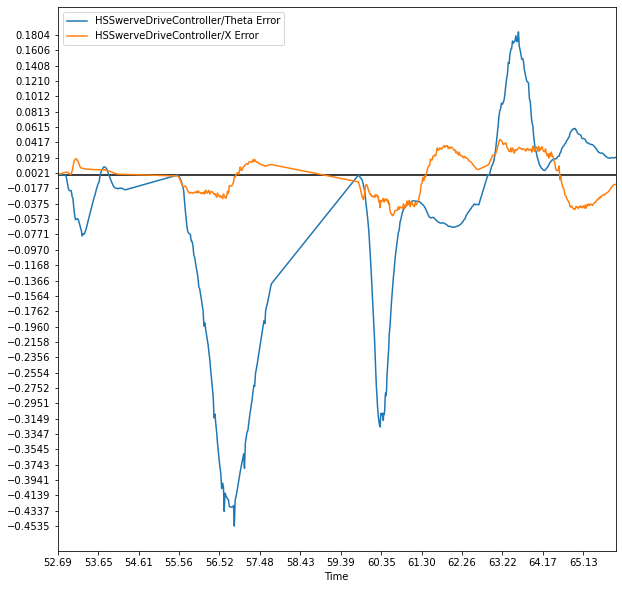

In [33]:
plt.figure(figsize=(10, 10))

for i in range(len(cols)):
    plt.plot(times[i], vals[i], label = cols[i].lstrip("NT:/SmartDashboard/") )

maxTime = MIN
minTime = MAX
maxVal = MIN
minVal = MAX
timeStampMax = MIN
timeStampMin = MAX
c = 0
for i in range(len(cols)):
    if maxTime < max(times[i]):
        if c != None and i == c:
            timeStampMax = max(times[i])
        maxTime = max(times[i])
    if maxVal < max(vals[i]):
        maxVal = max(vals[i])
    if minVal > min(vals[i]):
        minVal = min(vals[i])
    if minTime > min(times[i]):
        if c != None and i == c:
            timeStampMin = min(times[i])
        minTime = min(times[i])

        
if timeStampMin != MAX and timeStampMax != MIN:
    plt.xticks(numpy.arange(timeStampMin, timeStampMax, (timeStampMax-timeStampMin)/len(times[0])*35))
    plt.xlim(timeStampMin, timeStampMax)
else:
    plt.xticks(numpy.arange(minTime, maxTime, (maxTime-minTime)/len(times[0])*35))
    plt.xlim(minTime, maxTime)

plt.yticks(numpy.arange(minVal, maxVal, (maxVal-minVal)/len(vals[0])*15))
plt.xlabel("Time")

plt.hlines(y=0, xmin=0, xmax=maxTime, color="black")
plt.legend()
plt.show()